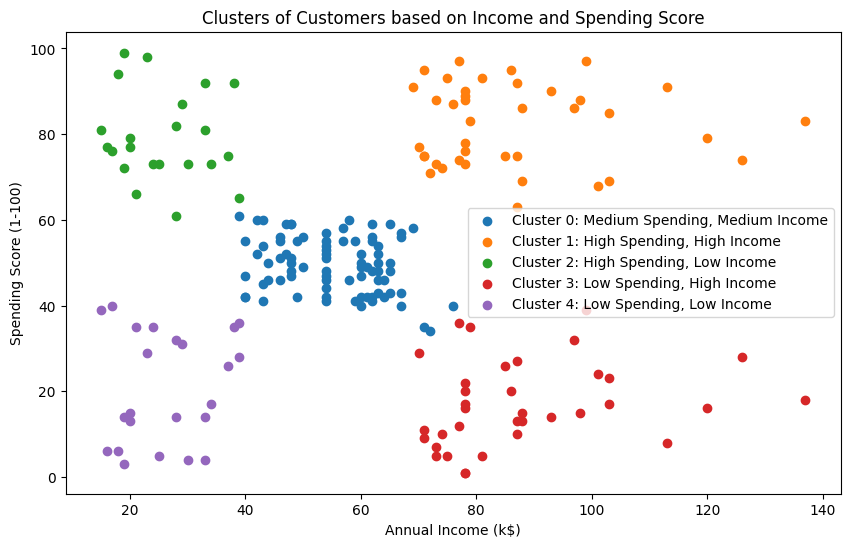

   Annual Income (k$)  Spending Score (1-100)  Cluster  \
0                  15                      39        4   
1                  15                      81        2   
2                  16                       6        4   
3                  16                      77        2   
4                  17                      40        4   

            Cluster Category  
0   Low Spending, Low Income  
1  High Spending, Low Income  
2   Low Spending, Low Income  
3  High Spending, Low Income  
4   Low Spending, Low Income  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('mall_customers.csv')

 (income and spend score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Define the cluster categories
cluster_categories = {

    0:'Medium Spending, Medium Income',
    1: 'High Spending, High Income',
    2: 'High Spending, Low Income',
    3: 'Low Spending, High Income',
    4: 'Low Spending, Low Income'
}

# Map cluster labels to cluster categories
data['Cluster Category'] = data['Cluster'].map(cluster_categories)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}: {cluster_categories[cluster]}')

plt.title('Clusters of Customers based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Display the data with cluster labels and categories
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'Cluster Category']].head())
